# TME4 - Perceptron

In [1]:
from tme4 import *
from mltools import *

In [2]:
def plot_evolution(losses, scores):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].plot(losses)
    ax[0].set_title("Evolution du cout en fonction du nombre d'itérations")
    ax[1].plot(scores)
    ax[1].set_title("Evolution du score en apprentissage en fonction du nombre d'itérations")
    plt.tight_layout()
    plt.show()

# Données linéairement séparables
Mélange de 2 gaussiennes, peu de bruit :

Score en train : 1.0
Score en test : 1.0


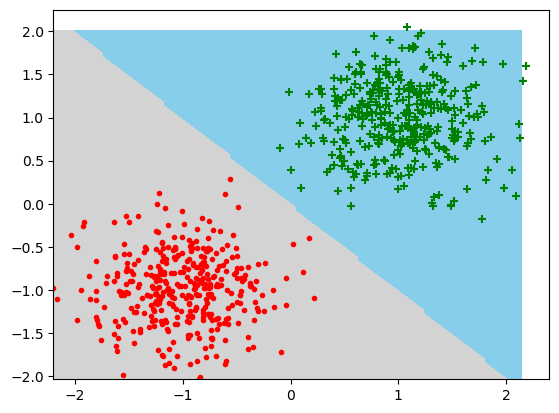

In [3]:
from sklearn.model_selection import train_test_split

datax, datay = gen_arti(epsilon=0.3, data_type=0)
indices = np.arange(len(datax))
datax, testx, datay, testy = train_test_split(datax, datay)

model = Lineaire(max_iter=2000)
model.fit(datax, datay)
print("Score en train :", model.score(datax, datay))
print("Score en test :", model.score(testx, testy))

plot_frontiere(datax, lambda x: np.sign(x.dot(model.w)), step=100)
plot_data(datax, datay)

Mélange de gaussiennes, bruitées :

Score en train : 0.9373333333333334
Score en test : 0.908


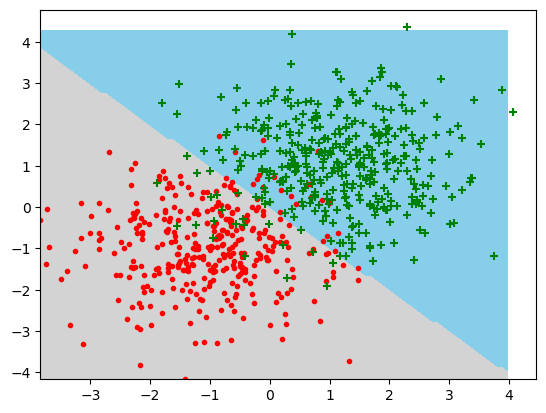

In [4]:
datax, datay = gen_arti(epsilon=1, data_type=0)
indices = np.arange(len(datax))
datax, testx, datay, testy = train_test_split(datax, datay)

model = Lineaire()
model.fit(datax, datay)
print("Score en train :", model.score(datax, datay))
print("Score en test :", model.score(testx, testy))

plot_frontiere(datax, lambda x: np.sign(x.dot(model.w)), step=100)
plot_data(datax, datay)

# Données USPS

In [5]:
alltrainx, alltrainy = load_usps("../data/USPS_train.txt")
alltestx, alltesty = load_usps("../data/USPS_test.txt")

def load_one_class(number):
    X_train, y_train = get_usps(number, alltrainx, alltrainy)
    X_test, y_test = get_usps(number, alltestx, alltesty)
    y_train = np.where(y_train == number, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == number, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test

def load_two_classes(neg, pos):
    X_train, y_train = get_usps([neg, pos], alltrainx, alltrainy)
    X_test, y_test = get_usps([neg, pos], alltestx, alltesty)
    y_train = np.where(y_train == neg, -1, 1).reshape(-1, 1)
    y_test = np.where(y_test == neg, -1, 1).reshape(-1, 1)
    return X_train, y_train, X_test, y_test

## 6 vs 9

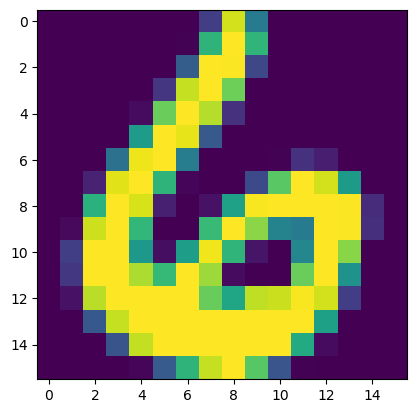

In [6]:
X_train, y_train, X_test, y_test = load_two_classes(6, 9)
show_usps(X_train[0])
plt.show()

Score en train : 0.9762996941896025
Score en test : 0.9510086455331412


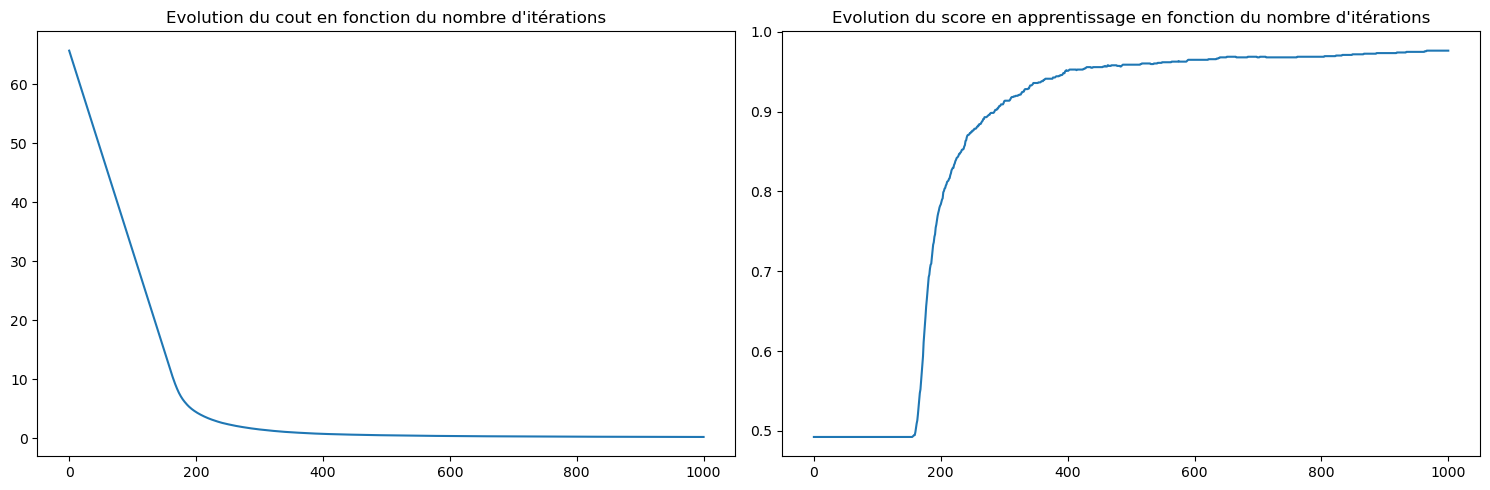

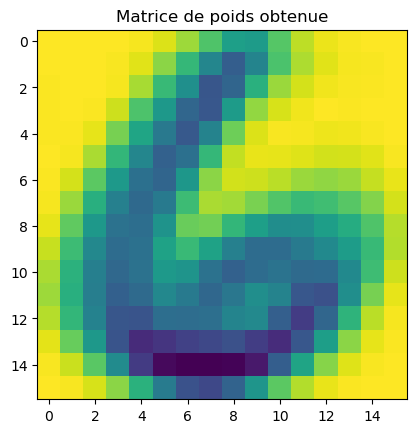

In [7]:
model = Lineaire(max_iter=1000)
w, weights, losses, scores = model.fit(X_train, y_train)

print('Score en train :', model.score(X_train, y_train))
print('Score en test :', model.score(X_test, y_test))

plot_evolution(losses, scores)

show_usps(w)
plt.title("Matrice de poids obtenue")
plt.show()

### Ajout d'un biais linéaire

Score en train : 0.9762996941896025
Score en test : 0.9481268011527377


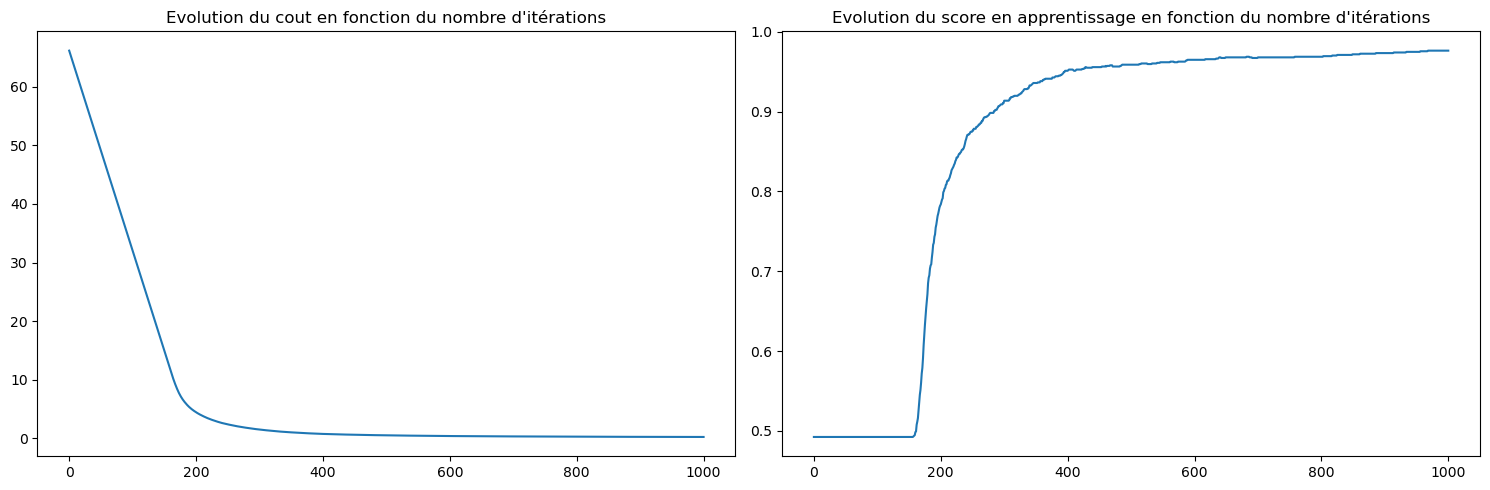

In [8]:
model = Lineaire(max_iter=1000, projection=proj_biais)
w, weights, losses, scores = model.fit(X_train, y_train)

print('Score en train :', model.score(X_train, y_train))
print('Score en test :', model.score(X_test, y_test))

plot_evolution(losses, scores)


## One-vs-all

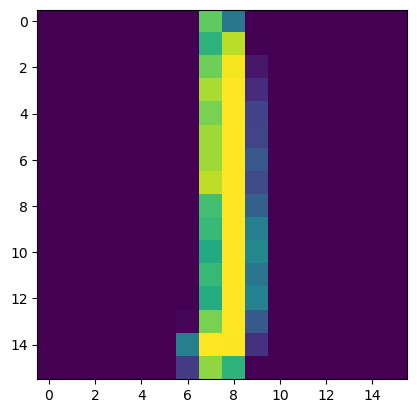

In [9]:
X_train, y_train, X_test, y_test = load_one_class(1)
show_usps(X_train[0])
plt.show()


Score en train : 0.8417910447761194
Score en test : 0.7916666666666666


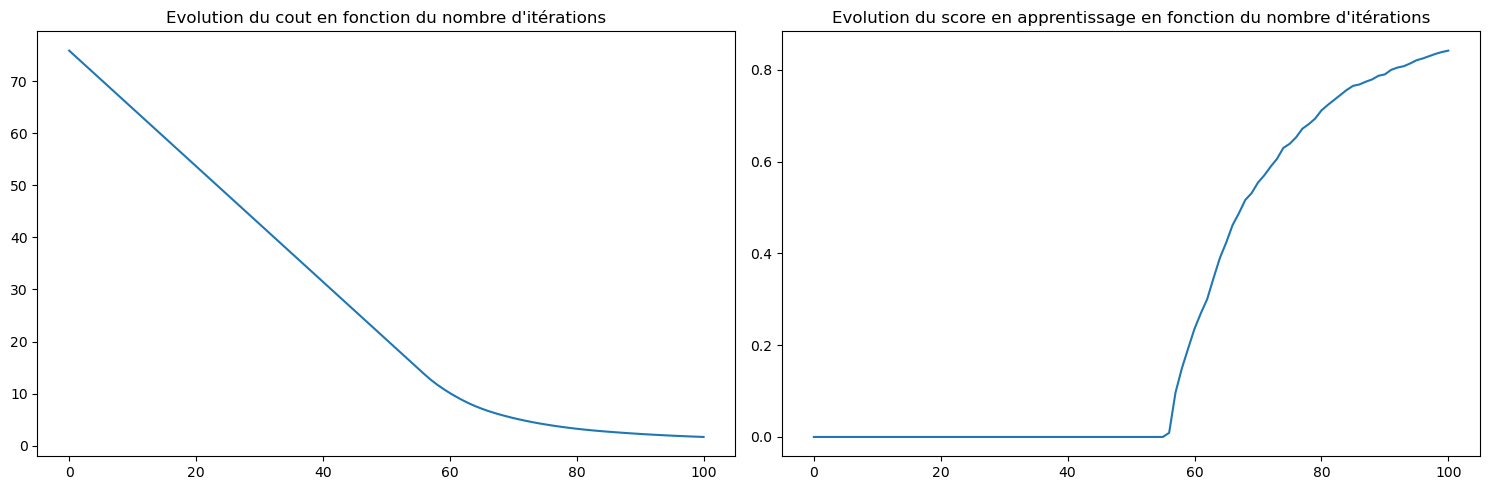

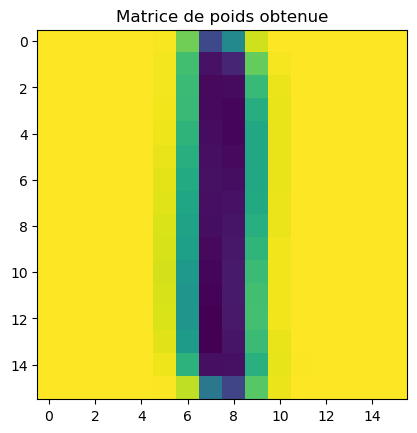

In [10]:
model = Lineaire()
w, weights, losses, scores = model.fit(X_train,y_train)

print('Score en train :', model.score(X_train, y_train))
print('Score en test :', model.score(X_test, y_test))

plot_evolution(losses, scores)

show_usps(w)
plt.title("Matrice de poids obtenue")
plt.show()

### Ajout d'un biais linéaire

Score en train : 0.9950248756218906
Score en test : 0.9621212121212122


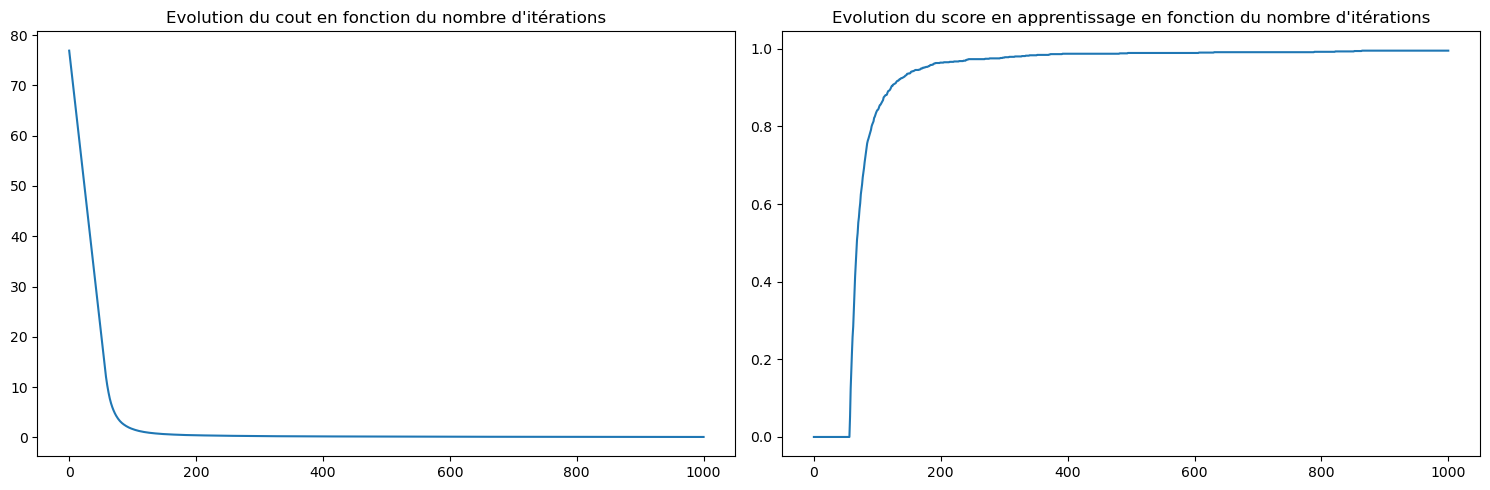

In [11]:
model = Lineaire(max_iter=1000, projection=proj_biais)
w, weights, losses, scores = model.fit(X_train, y_train)

print('Score en train :', model.score(X_train, y_train))
print('Score en test :', model.score(X_test, y_test))

plot_evolution(losses, scores)


# Données non linéairement séparables
(mélange de 4 gaussiennes)

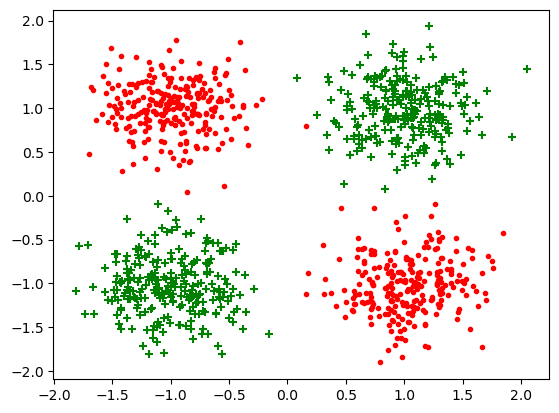

In [12]:
X, y = gen_arti(nbex=1000, data_type=1, epsilon=0.02)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

Score en train : 0.996
Score en test : 0.988


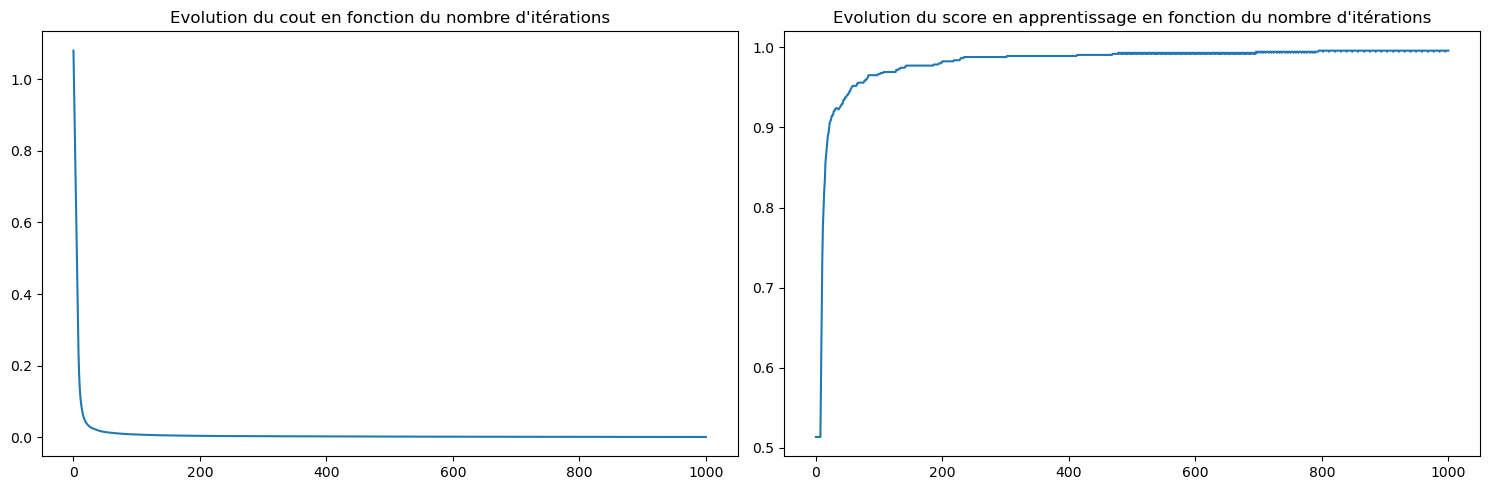

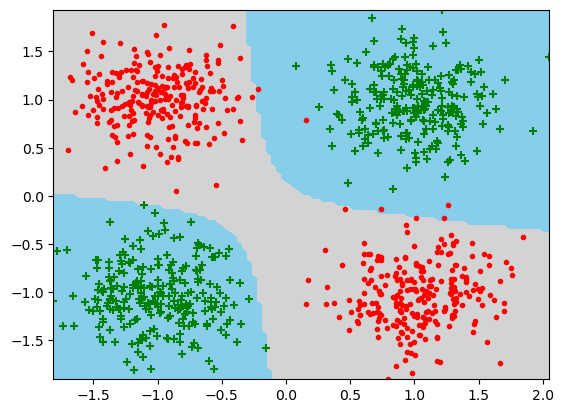

In [13]:
model = Lineaire(max_iter=1000, eps=1e-1, projection=proj_poly)
w, weights, losses, scores  = model.fit(X_train, y_train)
print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

plot_frontiere_perceptron(X, model, step=100)
plot_data(X, y)

# Echequier

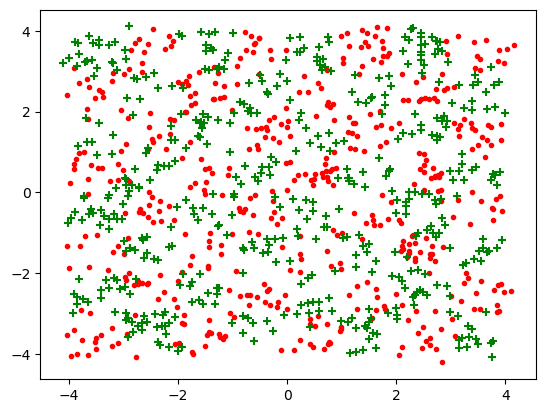

In [15]:
X, y = gen_arti(epsilon=0.1, data_type=2)
plot_data(X, y)


In [16]:
model = Lineaire(max_iter=1000, eps=1e-1, projection=proj_gauss)
w, weights, losses, scores  = model.fit(X_train, y_train)
print("Score en train :", model.score(X_train, y_train))
print("Score en test :", model.score(X_test, y_test))

plot_evolution(losses, scores)

plot_frontiere_perceptron(X, model, step=100)
plot_data(X, y)

TypeError: proj_gauss() missing 2 required positional arguments: 'base' and 'sigma'